In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df_top_albums = pd.read_csv("./output/top_albums_over_time.csv", sep = ";")
df_albums = pd.read_csv("./output/albums.csv", sep = ";")
df_genres = pd.read_csv("./output/genres.csv", sep = ";")

In [3]:
column_list = df_top_albums.columns.tolist()
albums_dict = {}
for column in column_list:
    if "album" in column:
        albums_dict[column] = df_top_albums[column].tolist()

In [4]:
def get_feature_dict(input):
    feature_dict = {}
    for key in albums_dict.keys():
        album_list = albums_dict[key]
        new_key = key.split("_")[0]
        feature_dict[new_key] = []
        for album in album_list:
            feature_arrays = df_albums.loc[df_albums["album"] == str(album)][input].values
            for features in feature_arrays:
                feature_dict[new_key].append(features)
    return feature_dict
top_genres_dict = get_feature_dict("genres_top")
top_genres_dict

{'2001': ['psychedelic pop,pop rock',
  'grunge,alternative rock',
  'alternative rock,art rock',
  'tbd',
  'pop rock,rock',
  'pop rock,psychedelic pop',
  'new wave,punk rock',
  'pop rock',
  'hard rock',
  'pop rock',
  'tbd',
  'acoustic rock,alternative rock',
  'psychedelic pop,pop rock',
  'pop rock',
  'rock opera,art rock',
  'pop rock',
  'blues rock,psychedelic rock,acid rock',
  'mod revival,new wave,power pop',
  'punk rock',
  'east coast hip hop,hardcore hip hop',
  'alternative rock,third wave ska,ska punk',
  'alterantive rock,alternative dance',
  'heavy metal',
  'tbd',
  'folk rock,alternative rock',
  'britpop',
  'chamber pop,twee pop,indie pop',
  'pop rock,singer/songwriter,blues rock',
  'tbd',
  'mod,beat music',
  'alternative rock,pop rock',
  'baroque pop',
  'alternative rock,big music,pop rock',
  'tbd',
  'tbd',
  'hard rock',
  'alternative rock,pop rock',
  'pop rock,singer/songwriter',
  'folk pop,folk rock',
  'east coast hip hop,mid-school hip hop

In [57]:
def get_feature_percentages(input_dict):
    feature_percentage_dict = {}
    for key in input_dict.keys():
        feature_lists = input_dict[key]
        feature_percentage_dict[key] = {}
        albums_total = len(feature_lists)
        for features in feature_lists:
            feature_list = str(features).split(",")
            features_album_split = len(feature_list)
            for feature in feature_list:
                feature_album_percentage = 1 / features_album_split
                feature_percentage = feature_album_percentage / albums_total
                if feature in feature_percentage_dict[key]:
                    feature_percentage_dict[key][feature] += feature_percentage
                else:
                    feature_percentage_dict[key][feature] = feature_percentage
    df_feature_percentage = pd.DataFrame.from_dict(feature_percentage_dict)
    #min_value = 0.1
    #under_min_value = df_feature_percentage[(df_feature_percentage[df_feature_percentage.columns[1:]] < min_value).all(axis=1)].index.tolist()
    #df_feature_percentage = df_feature_percentage.drop(labels = under_min_value, axis = 0)
    return df_feature_percentage
df_genre_percentage = get_feature_percentages(top_genres_dict)
df_genre_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
psychedelic pop,0.037500,0.03125,0.0250,0.037500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
pop rock,0.204167,0.08750,0.0875,0.125000,0.112500,0.125000,0.100000,0.100000,0.100000,0.100000,0.100000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000
grunge,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.012500,0.012500,0.012500,NaN,NaN,NaN
alternative rock,0.091667,0.03750,0.0125,0.025000,0.025000,0.025000,0.037500,0.037500,0.037500,0.037500,0.050000,0.050000,0.062500,0.050000,0.037500,0.037500,0.025000
art rock,0.025000,0.03750,0.0250,0.058333,0.079167,0.079167,0.091667,0.091667,0.091667,0.091667,0.091667,0.116667,0.129167,0.129167,0.116667,0.120833,0.108333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dream pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.008333
neo-psychedelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.008333
art pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025000
progressive pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833


In [58]:
genre_top_parents_dict = {}
for x in df_genres.index:
    genre = df_genres.iloc[x]["genre"]
    genre_parents = df_genres.loc[x, ["genre", "parent1", "parent2", "parent3"]].values.flatten().tolist()
    if str(genre_parents[-1]) == "nan":
        if str(genre_parents[-2]) == "nan":
            if str(genre_parents[-3]) == "nan":
                top_parent = genre_parents[-4]
            else:
                top_parent = genre_parents[-3]
        else:
            top_parent = genre_parents[-2]
    else:
        top_parent = genre_parents[-1]
    genre_top_parents_dict[genre] = top_parent
genre_top_parents_dict

{'power pop': 'pop',
 'psychedelic folk': 'folk',
 'psychedelic rock': 'rock',
 'canterbury scene': 'rock',
 'dance-punk': 'rock',
 'jazz rap': 'hip hop',
 'soul': 'r&b',
 'avant-prog': 'rock',
 'heavy metal': 'metal',
 'country': 'regional music',
 'art pop': 'pop',
 'post-rock': 'rock',
 'west coast hip hop': 'hip hop',
 'industrial rock': 'industrial music',
 'chamber jazz': 'jazz',
 'blue-eyed soul': 'pop',
 'synthpop': 'pop',
 'experimental big band': 'jazz',
 'microsound': 'experimental',
 'folk pop': 'pop',
 'free improvisation': 'experimental',
 'flamenco jazz': 'jazz',
 'art rock': 'rock',
 'ambient pop': 'pop',
 '2 tone': 'ska',
 'mbaqanga': 'african music',
 'free jazz': 'jazz',
 'poetry': 'spoken word',
 'freakbeat': 'rock',
 'industrial metal': 'metal',
 'reggae': 'regional music',
 'minneapolis sound': 'r&b',
 'chamber folk': 'folk',
 'funk': 'r&b',
 'sunshine pop': 'pop',
 'heartland rock': 'rock',
 'thrash metal': 'metal',
 'plunderphonics': 'experimental',
 'synth funk

In [59]:
def get_genre_percentages(genre_percentage_dict, top_genres_dict):
    top_genre_percentage_dict = {}
    for key in top_genres_dict.keys():
        genre_lists = top_genres_dict[key]
        top_genre_percentage_dict[key] = {}
        albums_total = len(genre_lists)
        for genres in genre_lists:
            genre_list = str(genres).split(",")
            genres_album_split = len(genre_list)
            for genre in genre_list:
                if genre not in ["tbd", "nan"]:
                    genre = genre_top_parents_dict[genre]
                    genre_album_percentage = 1 / genres_album_split
                    genre_percentage = genre_album_percentage / albums_total
                    if genre in top_genre_percentage_dict[key]:
                        top_genre_percentage_dict[key][genre] += genre_percentage
                    else:
                        top_genre_percentage_dict[key][genre] = genre_percentage
    df_top_genre_percentage = pd.DataFrame.from_dict(top_genre_percentage_dict)
    return df_top_genre_percentage
df_top_genre_percentage = get_genre_percentages(genre_percentage_dict, top_genres_dict)
df_top_genre_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
pop,0.333333,0.125000,0.1125,0.187500,0.175000,0.187500,0.162500,0.175000,0.175000,0.175000,0.175000,0.150000,0.150000,0.150000,0.137500,0.137500,0.183333
rock,0.400000,0.568750,0.4000,0.400000,0.545833,0.558333,0.583333,0.612500,0.612500,0.612500,0.620833,0.633333,0.645833,0.558333,0.512500,0.508333,0.429167
hip hop,0.050000,NaN,0.0500,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,0.150000,0.150000,0.150000
ska,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dance,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metal,0.025000,0.012500,NaN,0.050000,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.037500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500
singer/songwriter,0.020833,0.066667,0.1000,0.083333,0.100000,0.100000,0.100000,0.079167,0.066667,0.066667,0.050000,0.050000,0.037500,0.025000,0.037500,0.025000,0.012500
jazz,NaN,0.100000,0.1750,0.150000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.075000,0.100000,0.100000,0.100000
regional music,NaN,0.016667,0.0250,NaN,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
folk,NaN,0.035417,0.0750,0.045833,0.041667,0.041667,0.041667,0.020833,0.033333,0.033333,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


<Figure size 1800x1200 with 0 Axes>

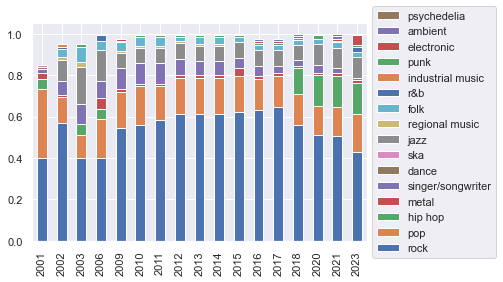

In [60]:
def create_graph(df, name):
    sns.set()
    plt.figure(dpi = 300)
    df = df.sort_values("2001", ascending = False)
    ax = df.T.plot(kind="bar", legend = False, stacked=True)
    handles, labels = ax.get_legend_handles_labels()
    handles = handles[::-1]
    labels = labels[::-1]
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.savefig("plots/" + name + ".png", dpi = 300, bbox_inches = "tight", pad_inches = 0.5, format = "png")
    plt.show()
create_graph(df_top_genre_percentage, "top_genre")

In [61]:
def get_child_genres(genres_dict, parent_genre):
    feature_genre_dict = {}
    #child_genres = genre_top_parents_dict[parent_genre]
    for year in genres_dict:
            for genres in genres_dict[year]:
                genre_list = genres.split(",")
                retrieved_child_genre_list = []
                for genre in genre_list:
                    if genre in genre_top_parents_dict.keys():
                        if genre_top_parents_dict[genre] == parent_genre:
                            retrieved_child_genre_list.append(genre)
                retrieved_child_genres = ",".join(retrieved_child_genre_list)
                if year in feature_genre_dict.keys():
                    feature_genre_dict[year].append(retrieved_child_genres)
                else:
                    feature_genre_dict[year] = [retrieved_child_genres]
    return feature_genre_dict
rock_genre_dict = get_child_genres(top_genres_dict, "rock")
rock_genre_dict

{'2001': ['',
  'grunge,alternative rock',
  'alternative rock,art rock',
  '',
  'rock',
  '',
  'new wave,punk rock',
  '',
  'hard rock',
  '',
  '',
  'acoustic rock,alternative rock',
  '',
  '',
  'rock opera,art rock',
  '',
  'blues rock,psychedelic rock,acid rock',
  'mod revival,new wave',
  'punk rock',
  '',
  'alternative rock,ska punk',
  'alterantive rock',
  '',
  '',
  'folk rock,alternative rock',
  'britpop',
  '',
  'blues rock',
  '',
  'mod',
  'alternative rock',
  '',
  'alternative rock',
  '',
  '',
  'hard rock',
  'alternative rock',
  '',
  'folk rock',
  ''],
 '2002': ['',
  '',
  'folk rock',
  'roots rock',
  'new wave',
  'punk rock',
  '',
  'roots rock,folk rock',
  '',
  '',
  'blues rock,psychedelic rock,acid rock',
  '',
  'art rock,experimental rock',
  'folk rock',
  'blues rock,roots rock',
  'blues rock',
  'psychedelic rock',
  'psychedelic rock,blues rock,acid rock',
  'psychedelic rock',
  'baggy',
  '',
  'alternative rock,indie rock',
  ''

In [62]:
df_genre_rock_percentage = get_feature_percentages(rock_genre_dict)
df_genre_rock_percentage = df_genre_rock_percentage.drop("")
df_genre_rock_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
grunge,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.012500,0.012500,0.0125,NaN,NaN,NaN
alternative rock,0.137500,0.0375,0.012500,0.025000,0.025000,0.025000,0.037500,0.037500,0.037500,0.037500,0.050000,0.050000,0.062500,0.0500,0.0375,0.0375,0.0250
art rock,0.025000,0.0375,0.025000,0.062500,0.087500,0.087500,0.100000,0.100000,0.100000,0.100000,0.100000,0.137500,0.150000,0.1500,0.1250,0.1375,0.1125
rock,0.025000,NaN,NaN,0.025000,NaN,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.0250,0.0250,0.0250,0.0250
new wave,0.025000,0.0250,0.025000,0.012500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.0125,0.0125,0.0125,0.0125
punk rock,0.037500,0.0500,0.075000,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,NaN,NaN,NaN,NaN
hard rock,0.050000,0.0375,0.025000,0.050000,0.075000,0.075000,0.050000,0.062500,0.062500,0.062500,0.062500,0.050000,0.050000,0.0500,0.0500,0.0500,0.0250
acoustic rock,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rock opera,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blues rock,0.033333,0.0875,0.016667,0.041667,0.016667,0.016667,0.016667,0.029167,0.020833,0.020833,0.020833,0.008333,0.008333,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

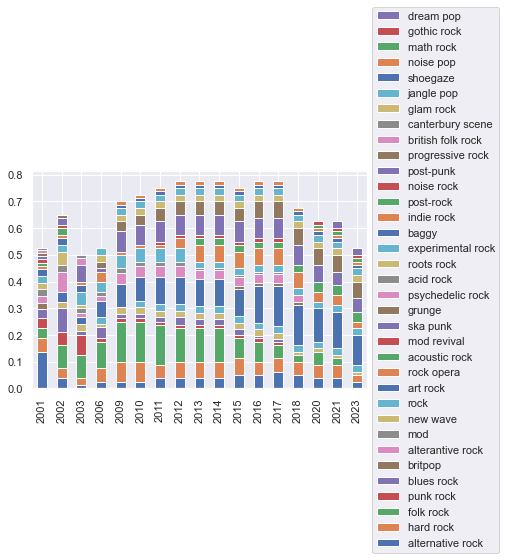

In [63]:
create_graph(df_genre_rock_percentage, "genre_rock")

In [64]:
pop_genre_dict = get_child_genres(top_genres_dict, "pop")
df_genre_pop_percentage = get_feature_percentages(pop_genre_dict)
df_genre_pop_percentage = df_genre_pop_percentage.drop("")
df_genre_pop_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
psychedelic pop,0.037500,0.0375,0.025,0.0375,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.0250
pop rock,0.275000,0.1250,0.100,0.1500,0.125,0.150,0.125,0.125,0.125,0.125,0.125,0.100,0.100,0.100,0.100,0.100,0.1000
power pop,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chamber pop,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,0.025,0.025,0.025,0.025,0.025,0.025,0.025,NaN,NaN,NaN
twee pop,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indie pop,0.008333,NaN,NaN,0.0250,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.0250
beat music,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baroque pop,0.025000,0.0125,NaN,0.0125,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.0250
big music,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
folk pop,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

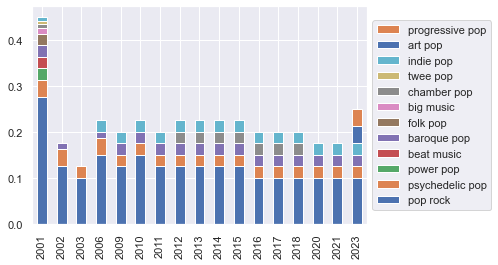

In [65]:
create_graph(df_genre_pop_percentage, "genre_pop")

In [66]:
hip_hop_genre_dict = get_child_genres(top_genres_dict, "hip hop")
df_genre_hip_hop_percentage = get_feature_percentages(hip_hop_genre_dict)
df_genre_hip_hop_percentage = df_genre_hip_hop_percentage.drop("")
df_genre_hip_hop_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
east coast hip hop,0.0250,NaN,0.01875,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016667,0.016667,0.016667,0.016667
hardcore hip hop,0.0125,NaN,0.00625,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016667,0.016667,0.016667,0.016667
mid-school hip hop,0.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gangsta rap,NaN,NaN,0.01250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political hip hop,NaN,NaN,0.00625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conscious hip hop,NaN,NaN,0.00625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833,0.020833,0.020833,0.020833
boom bap,NaN,NaN,NaN,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016667,0.016667,0.016667,0.016667
west coast hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020833,0.020833,0.020833,0.020833
jazz rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008333,0.008333,0.008333,0.008333
pop rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012500,0.012500,0.012500,0.012500


<Figure size 1800x1200 with 0 Axes>

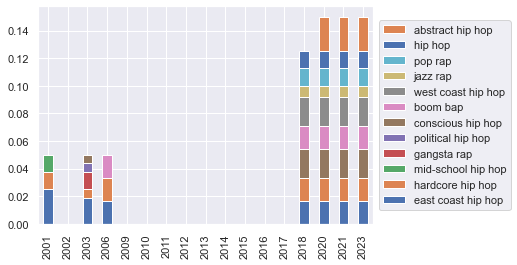

In [67]:
create_graph(df_genre_hip_hop_percentage, "genre_hip_hop")

In [68]:
secondary_genres_dict = get_feature_dict("genres_secondary")
df_secondary_genre_percentage = get_genre_percentages(secondary_genre_percentage_dict, secondary_genres_dict)
df_secondary_genre_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
rock,0.391667,0.408333,0.382917,0.383333,0.512500,0.537500,0.545833,0.537500,0.500000,0.500000,0.525000,0.504167,0.512500,0.445833,0.429167,0.404167,0.341667
pop,0.158333,0.054167,0.033333,0.120833,0.112500,0.112500,0.087500,0.104167,0.104167,0.104167,0.104167,0.100000,0.108333,0.133333,0.108333,0.129167,0.150000
ska,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,NaN,NaN,NaN,NaN
regional music,0.049167,0.084167,0.042500,0.031250,0.014583,0.014583,0.014583,0.014583,0.020833,0.020833,0.020833,0.020833,0.020833,0.012500,0.012500,0.018750,0.020833
rock & toll,0.008333,NaN,NaN,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,NaN,NaN,NaN,NaN
soundtrack,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hip hop,0.039583,NaN,0.041667,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060000,0.085000,0.085000,0.085000
electronic,0.006250,0.025000,NaN,NaN,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.020833,0.029167,0.029167,0.020833,0.029167,0.029167
psychedelia,0.006250,0.008333,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006250,0.008333
dance,0.006250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

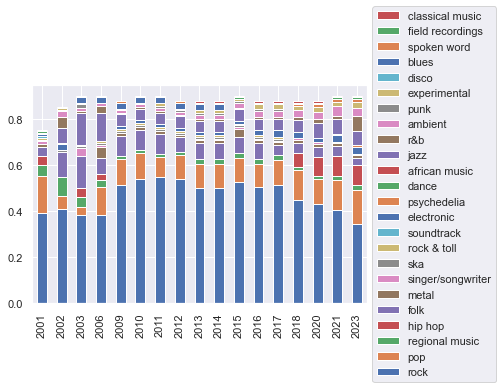

In [69]:
create_graph(df_secondary_genre_percentage, "secondary_genre")

In [70]:
tags_dict = get_feature_dict("tags")
df_tags_percentage = get_feature_percentages(tags_dict)
df_tags_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
psychedelic,0.018412,0.017236,0.011828,0.017768,0.021243,0.022714,0.021243,0.018971,0.016471,0.016471,0.016471,0.016471,0.016471,0.013971,0.011471,0.013971,0.013971
playful,0.020314,0.027301,0.022388,0.019381,0.014387,0.015858,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.014387,0.011471,0.015221,0.013971,0.011471
melodic,0.053245,0.035044,0.031670,0.035662,0.028222,0.029693,0.025950,0.027037,0.029537,0.029537,0.030853,0.028353,0.028353,0.027936,0.026783,0.026471,0.028971
male vocals,0.067858,0.064683,0.062028,0.069909,0.080495,0.081966,0.083222,0.082037,0.079537,0.079537,0.077241,0.075853,0.075853,0.077936,0.071783,0.073971,0.063971
optimistic,0.006090,0.003690,0.006815,0.003636,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
infernal,NaN,NaN,NaN,0.001316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apocalyptic,NaN,NaN,NaN,0.001316,NaN,NaN,NaN,NaN,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
hateful,NaN,NaN,NaN,0.001316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disturbing,NaN,NaN,NaN,0.001316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

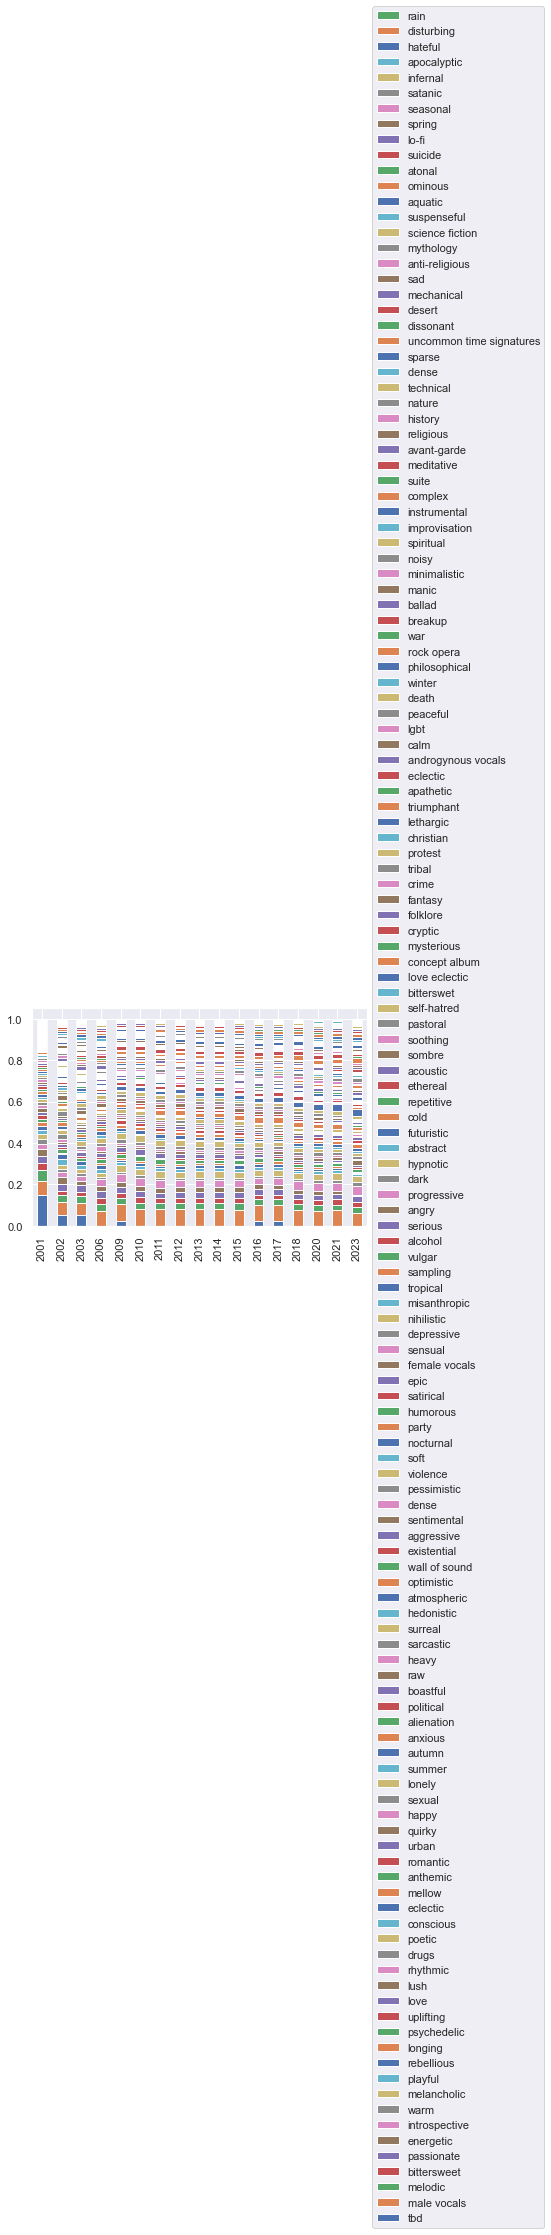

In [71]:
create_graph(df_tags_percentage, "tags")

In [75]:
tag_list = []
for row in df_albums["tags"].tolist():
    row_tag_list = str(row).split(",")
    for tag in row_tag_list:
        tag_list.append(tag)
tag_list = list(set(tag_list))
parent_tags_dict = { 
"sad":                ["sad", "suicide", "disturbing", "breakup", "death", "apathetic", "lethargic", "dark", 
                        "pessimistic", "misanthopric", "nihilistic", "depressive", "lonely", "drugs", "anxious",
                        "melancholic", "bittersweet"],
"narrative":          ["science fiction", "mythology", "anti-religious", "religious", "history", "philosophical", 
                        "spiritual", "war", "rock opera", "ballad", "apocalyptic", "christian", "protest", "crime",
                        "fantasy", "folklore", "futuristic", "epic", "satirical", "humourous", "political", "alienation",
                        "anthemic", "sarcastic"],
"calm":               ["calm", "sparse", "meditative", "lo-fi", "pastoral", "psychedelic", "mellow", "introspective",
                        "soft", "minimal", "sparse", "minimalistic", "soothing"],
"happy":              ["party", "poetic", "boastful", "optimistic", "happy", "quirky",
                        "uplifting", "lush", "warm", "playful", "triumphant"],
"love":               ["sensual", "sexual", "hedonistic", "romantic", "love", "love eclectic"],
"avant-garde":        ["avant-garde", "dissonant", "uncommon time signatures", "atonal", "technical", "complex", "abstract"],
"environmental":      ["aquatic", "rain", "nature", "desert", "aquatic", "seasonal", "spring", "winter", "summer",
                        "autumn", "urban", "tropical", "tribal"],
"angry":              ["hateful", "infernal", "satanic", "self-hatred", "angry", "vulgar", "alcohol", "violence",
                        "aggressive", "rebellious"],
"serious":            ["ominous", "suspenseful", "cryptic", "mysterious", "sombre", "serious", "cold", "heavy", "raw",
                        "conscious"],
"energetic":          ["dense", "noisy", "manic", "energetic", "passionate"],
"instrumentation":    ["mechanical", "suite", "instrumental", "improvisation", "androgynous vocals", "acoustic",
                        "female vocals", "male vocals", "melodic", "rythmic"],
"other":              ["tbd", "lgbt", "concept album", "eclectic", "bittersweet", "ethereal", "repetitive", "hypnotic", "progressive",
                        "smapling", "nocturnal", "sentimental", "existential", "wall of sound", "atmospheric", "surreal", "longing"] 
}
parent_tags_dict

{'sad': ['sad',
  'suicide',
  'disturbing',
  'breakup',
  'death',
  'apathetic',
  'lethargic',
  'dark',
  'pessimistic',
  'misanthopric',
  'nihilistic',
  'depressive',
  'lonely',
  'drugs',
  'anxious',
  'melancholic',
  'bittersweet'],
 'narrative': ['science fiction',
  'mythology',
  'anti-religious',
  'religious',
  'history',
  'philosophical',
  'spiritual',
  'war',
  'rock opera',
  'ballad',
  'apocalyptic',
  'christian',
  'protest',
  'crime',
  'fantasy',
  'folklore',
  'futuristic',
  'epic',
  'satirical',
  'humourous',
  'political',
  'alienation',
  'anthemic',
  'sarcastic'],
 'calm': ['calm',
  'sparse',
  'meditative',
  'lo-fi',
  'pastoral',
  'psychedelic',
  'mellow',
  'introspective',
  'soft',
  'minimal',
  'sparse',
  'minimalistic',
  'soothing'],
 'happy': ['party',
  'poetic',
  'boastful',
  'optimistic',
  'happy',
  'quirky',
  'uplifting',
  'lush',
  'warm',
  'playful',
  'triumphant'],
 'love': ['sensual',
  'sexual',
  'hedonistic',

In [76]:
tags_dict = get_feature_dict("tags")

parent_tag_dict = {}
for year in tags_dict:
        for tag_list in tags_dict[year]:
            tags = tag_list.split(",")
            parent_tag_list = []
            for tag in tags:
                for parent_tag in parent_tags_dict:
                    child_tags = parent_tags_dict[parent_tag]
                    if tag in child_tags:
                        parent_tag_list.append(parent_tag)
            parent_tags = ",".join(parent_tag_list)
            if year in parent_tag_dict.keys():
                parent_tag_dict[year].append(parent_tags)
            else:
                parent_tag_dict[year] = [parent_tags]
parent_tag_dict

{'2001': ['calm,happy,instrumentation,instrumentation,happy,other,happy,happy,happy,sad',
  'energetic,angry,instrumentation,narrative,sad,angry,narrative,energetic,sad,angry,angry,sad,instrumentation,narrative,sad,sad,other,sad',
  'sad,sad,narrative,narrative,other,instrumentation,other,sad,serious,calm',
  'other',
  'other,instrumentation,happy,instrumentation,happy,love,energetic,calm,angry,narrative,calm,energetic,sad,other,serious,other,narrative',
  'calm,instrumentation,instrumentation,sad,other,happy,happy,happy,happy,other',
  'narrative,energetic,angry,other,instrumentation,energetic,environmental,serious,narrative,narrative,happy,happy,instrumentation,happy',
  'instrumentation,happy,instrumentation,sad,other,environmental,happy,love,love,happy,happy',
  'narrative,narrative,instrumentation,energetic,energetic,instrumentation,angry,serious,other,narrative,serious,other,serious',
  'instrumentation,happy,instrumentation,love,happy,calm,energetic,happy,happy,happy,energetic,

In [77]:
df_tags_parent_percentage = get_feature_percentages(parent_tag_dict)
df_tags_parent_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
calm,0.064352,0.112145,0.104341,0.103113,0.102302,0.105243,0.098298,0.092295,0.089795,0.089795,0.080704,0.078431,0.080704,0.087689,0.095110,0.096798,0.105309
happy,0.132234,0.103697,0.101491,0.109070,0.100516,0.103457,0.092346,0.094518,0.094290,0.094290,0.089518,0.084467,0.086740,0.090530,0.089369,0.085927,0.100877
instrumentation,0.126854,0.151302,0.157249,0.155901,0.141489,0.144430,0.144986,0.141343,0.148717,0.148717,0.148192,0.144399,0.144399,0.144400,0.141503,0.142834,0.142733
other,0.261514,0.158766,0.158292,0.132063,0.162820,0.142232,0.140982,0.145149,0.147522,0.147522,0.145609,0.174593,0.181411,0.157991,0.171229,0.173762,0.179721
sad,0.105272,0.104690,0.109495,0.104321,0.130023,0.131494,0.138022,0.137188,0.139512,0.139512,0.143968,0.148981,0.144436,0.141887,0.130402,0.135543,0.126275
energetic,0.071855,0.087038,0.078840,0.080580,0.070898,0.073839,0.074673,0.076725,0.073997,0.073997,0.078246,0.071219,0.068947,0.064860,0.062231,0.061647,0.047985
angry,0.042804,0.038086,0.038157,0.036799,0.014425,0.015895,0.016312,0.019090,0.016590,0.016590,0.026557,0.019367,0.019367,0.026382,0.020827,0.020827,0.012771
narrative,0.062783,0.065483,0.065734,0.090980,0.092356,0.095297,0.091130,0.101982,0.105038,0.105038,0.105087,0.101705,0.099432,0.115088,0.106486,0.106129,0.095296
serious,0.041300,0.064071,0.075583,0.071230,0.085152,0.086622,0.094122,0.082632,0.082683,0.082683,0.080624,0.082127,0.082127,0.081483,0.087614,0.086900,0.076900
love,0.050344,0.055751,0.041282,0.047995,0.054035,0.055506,0.052033,0.054900,0.047400,0.047400,0.044900,0.034799,0.032526,0.027923,0.027766,0.025385,0.040385


<Figure size 1800x1200 with 0 Axes>

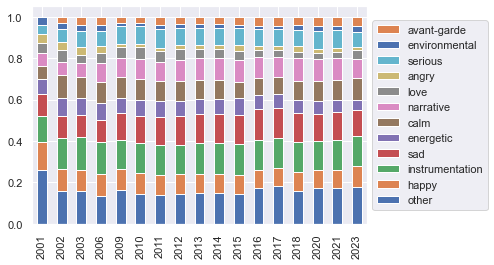

In [78]:
create_graph(df_tags_parent_percentage, "tags_parent")

In [79]:
def get_child_tags(tags_dict, parent_tag):
    feature_tag_dict = {}
    child_tags = parent_tags_dict[parent_tag]
    for year in tags_dict:
            for tag_list in tags_dict[year]:
                tags = tag_list.split(",")
                retrieved_child_tag_list = []
                for tag in tags:
                    if tag in child_tags:
                        retrieved_child_tag_list.append(tag)
                retrieved_child_tags = ",".join(retrieved_child_tag_list)
                if year in feature_tag_dict.keys():
                    feature_tag_dict[year].append(retrieved_child_tags)
                else:
                    feature_tag_dict[year] = [retrieved_child_tags]
    return feature_tag_dict
environmental_tag_dict = get_child_tags(tags_dict, "environmental")
environmental_tag_dict

{'2001': ['',
  '',
  '',
  '',
  '',
  '',
  'urban',
  'summer',
  '',
  '',
  '',
  '',
  'summer',
  '',
  '',
  'autumn',
  '',
  'urban',
  'urban',
  '',
  'summer,tropical,urban',
  '',
  '',
  '',
  'autumn',
  'urban,summer',
  'autumn',
  'autumn',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'urban',
  'autumn',
  'summer,tribal,tropical',
  'winter',
  'urban'],
 '2002': ['',
  '',
  '',
  'urban',
  '',
  'urban',
  '',
  'nature,autumn',
  '',
  '',
  '',
  '',
  'urban',
  '',
  'summer',
  '',
  'summer',
  'summer',
  '',
  'summer',
  '',
  '',
  '',
  'autumn,nature',
  'winter',
  '',
  '',
  'urban',
  'tribal,desert',
  'urban,summer',
  '',
  '',
  'autumn',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 '2003': ['',
  '',
  'urban',
  '',
  '',
  '',
  '',
  'autumn',
  'summer',
  '',
  '',
  '',
  '',
  '',
  '',
  'nature,autumn',
  'autumn',
  'urban',
  'urban',
  '',
  '',
  '',
  '',
  '',
  'autumn,nature',
  '',
  '',
  '',
  'aquatic',
  '',
  'urban',
  

In [83]:
df_tags_environmental_percentage = get_feature_percentages(environmental_tag_dict)
df_tags_environmental_percentage = df_tags_environmental_percentage.drop("")
df_tags_environmental_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
urban,0.145833,0.1125,0.1875,0.175000,0.100,0.100,0.125,0.1250,0.1000,0.1000,0.1000,0.1000,0.1000,0.1500,0.150,0.125,0.125000
summer,0.079167,0.1125,0.0375,0.058333,0.050,0.050,0.025,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.0250,0.025,0.025,0.033333
autumn,0.125000,0.0500,0.0750,0.050000,0.075,0.075,0.075,0.0875,0.0875,0.0875,0.0625,0.0375,0.0375,0.0125,0.025,NaN,NaN
tropical,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tribal,0.008333,0.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winter,0.025000,0.0250,0.0250,NaN,NaN,NaN,NaN,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,NaN,NaN,0.025000
nature,NaN,0.0250,0.0250,0.012500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008333
desert,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aquatic,NaN,NaN,0.0250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008333
spring,NaN,NaN,NaN,0.020833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

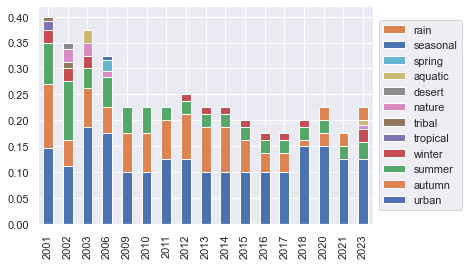

In [81]:
create_graph(df_tags_environmental_percentage, "tags_environmental")

In [84]:
instrumentation_tag_dict = get_child_tags(tags_dict, "instrumentation")
df_tags_instrumentation_percentage = get_feature_percentages(instrumentation_tag_dict)
df_tags_instrumentation_percentage = df_tags_instrumentation_percentage.drop("")
df_tags_instrumentation_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
melodic,0.337500,0.229167,0.172917,0.214583,0.175000,0.187500,0.162500,0.170833,0.179167,0.179167,0.191667,0.179167,0.179167,0.166667,0.158333,0.145833,0.170833
male vocals,0.475000,0.518750,0.518750,0.570833,0.650000,0.662500,0.675000,0.683333,0.641667,0.641667,0.629167,0.616667,0.616667,0.641667,0.583333,0.595833,0.508333
acoustic,0.016667,0.050000,0.087500,0.062500,0.052083,0.052083,0.052083,0.027083,0.035417,0.035417,0.035417,0.035417,0.035417,0.035417,0.035417,0.035417,0.035417
female vocals,0.012500,0.033333,0.027083,0.012500,0.012500,0.012500,0.025000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.020833,0.012500,0.012500,0.075000
androgynous vocals,0.008333,0.031250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvisation,NaN,0.033333,0.056250,0.041667,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.027083,0.027083,0.027083
instrumental,NaN,0.033333,0.060417,0.054167,0.027083,0.027083,0.027083,0.027083,0.039583,0.039583,0.039583,0.039583,0.039583,0.039583,0.052083,0.052083,0.052083
suite,NaN,0.006250,0.018750,0.018750,0.018750,0.018750,0.018750,0.018750,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
mechanical,NaN,0.014583,0.008333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1800x1200 with 0 Axes>

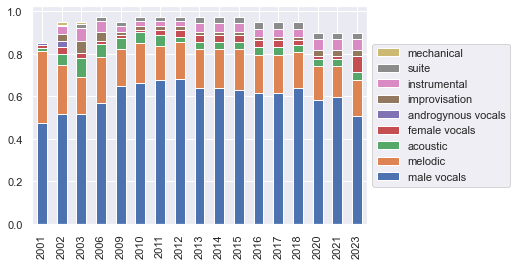

In [85]:
create_graph(df_tags_instrumentation_percentage, "tags_instrumentation")

In [86]:
other_tag_dict = get_child_tags(tags_dict, "other")
df_tags_other_percentage = get_feature_percentages(other_tag_dict)
df_tags_other_percentage = df_tags_other_percentage.drop("")
df_tags_other_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
eclectic,0.095833,0.110417,0.070833,0.134167,0.113333,0.121667,0.121667,0.121667,0.113333,0.113333,0.113333,0.100833,0.100833,0.083333,0.100833,0.095833,0.095833
existential,0.045833,0.077083,0.046667,0.031250,0.081250,0.081250,0.081250,0.087500,0.087500,0.087500,0.112500,0.112500,0.112500,0.120833,0.052083,0.039583,0.039583
atmospheric,0.030000,0.052083,0.038333,0.044583,0.080000,0.080000,0.080000,0.080000,0.092500,0.092500,0.092500,0.105000,0.111250,0.111250,0.125833,0.146667,0.163333
tbd,0.150000,0.050000,0.050000,NaN,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,0.025000,0.025000,NaN,NaN,NaN,NaN
bittersweet,0.194583,0.139583,0.150000,0.168333,0.168333,0.176667,0.143333,0.149583,0.157917,0.157917,0.132917,0.120417,0.101667,0.105000,0.110000,0.113333,0.105000
surreal,0.037500,0.097917,0.139583,0.142500,0.113333,0.121667,0.121667,0.121667,0.096667,0.096667,0.071667,0.084167,0.084167,0.079167,0.084167,0.091667,0.054167
longing,0.090417,0.068750,0.016667,0.068333,0.047500,0.047500,0.047500,0.047500,0.047500,0.047500,0.047500,0.047500,0.053750,0.048750,0.053750,0.048750,0.023750
progressive,0.016667,0.029167,0.006250,0.048750,0.023750,0.023750,0.036250,0.036250,0.036250,0.036250,0.061250,0.048750,0.048750,0.048750,0.048750,0.048750,0.048750
nocturnal,0.016667,0.052083,0.105000,0.054167,0.045833,0.045833,0.058333,0.045833,0.037500,0.037500,0.037500,0.050000,0.050000,0.050000,0.064583,0.052083,0.064583
concept album,0.008333,0.008333,0.045833,0.065417,0.057083,0.057083,0.048750,0.067500,0.075833,0.075833,0.075833,0.075833,0.075833,0.096667,0.090417,0.090417,0.102917


<Figure size 1800x1200 with 0 Axes>

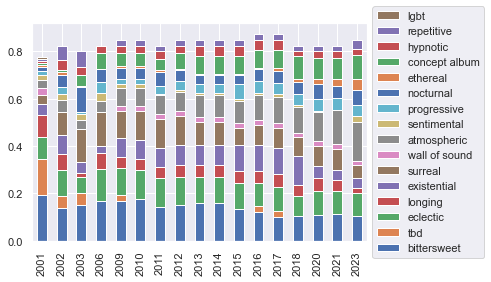

In [64]:
create_graph(df_tags_other_percentage, "tags_other")

In [87]:
narrative_tag_dict = get_child_tags(tags_dict, "narrative")
df_tags_narrative_percentage = get_feature_percentages(narrative_tag_dict)
df_tags_narrative_percentage = df_tags_narrative_percentage.drop("")
df_tags_narrative_percentage

,2001,2002,2003,2006,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2021,2023
sarcastic,0.050238,0.050000,0.09875,0.106250,0.093750,0.106250,0.106250,0.111250,0.111250,0.111250,0.113333,0.113333,0.113333,0.088333,0.105000,0.080000,0.042500
alienation,0.066905,0.064583,0.04250,0.012500,0.018750,0.018750,0.018750,0.027083,0.027083,0.027083,0.035417,0.035417,0.035417,0.035417,0.018750,0.018750,0.018750
anthemic,0.098750,0.075000,0.06250,0.035417,0.029167,0.029167,0.016667,0.025000,0.025000,0.025000,0.039583,0.033333,0.033333,0.037500,0.020833,0.020833,0.020833
futuristic,0.012500,0.020833,NaN,0.012500,0.037500,0.037500,0.037500,0.037500,0.037500,0.037500,0.037500,0.062500,0.062500,0.062500,0.037500,0.062500,0.037500
satirical,0.025833,0.012500,0.02375,0.018750,0.006250,0.018750,0.018750,0.023750,0.023750,0.023750,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500
political,0.060655,0.006250,0.03625,0.029167,0.045833,0.045833,0.045833,0.025833,0.025833,0.025833,0.025833,0.019583,0.019583,0.023750,0.023750,0.023750,0.023750
protest,0.008333,0.012500,0.02375,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.014583,0.008333,0.008333,0.008333,0.012500,0.012500,0.012500,0.012500
fantasy,0.008333,0.005000,NaN,0.008333,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.008333
folklore,0.008333,NaN,NaN,0.008333,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,NaN
epic,0.018155,0.017500,0.01250,0.039583,0.033333,0.033333,0.020833,0.034167,0.046667,0.046667,0.052917,0.046667,0.046667,0.059167,0.050833,0.050833,0.075833


<Figure size 1800x1200 with 0 Axes>

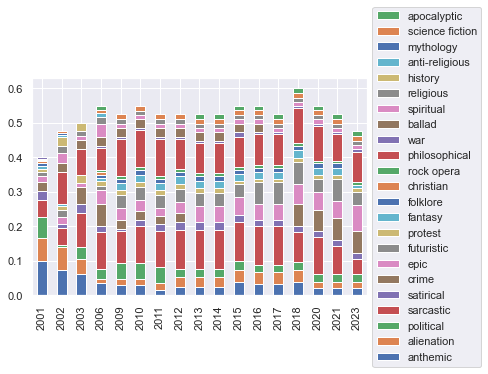

In [88]:
create_graph(df_tags_narrative_percentage, "tags_narrative")